In [1]:
#202331090_Daffa Laksmana Naufal
import cv2
import numpy as np
import matplotlib.pyplot as plt

(600, 600)


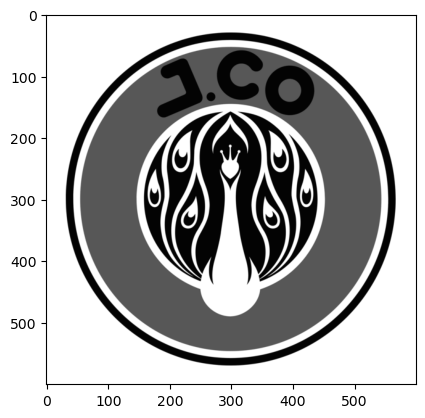

In [2]:
#202331090_Daffa Laksmana Naufal
citra_j = cv2.imread("jco.png")
citra_j = cv2.cvtColor(citra_j,cv2.COLOR_BGR2GRAY)
print(citra_j.shape)

plt.imshow(citra_j, cmap = "gray")

In [3]:
#202331090_Daffa Laksmana Naufal
kernel = np.array ([[-1, 0, -1], [0, 4, 0,], [-1, 0, -1]])

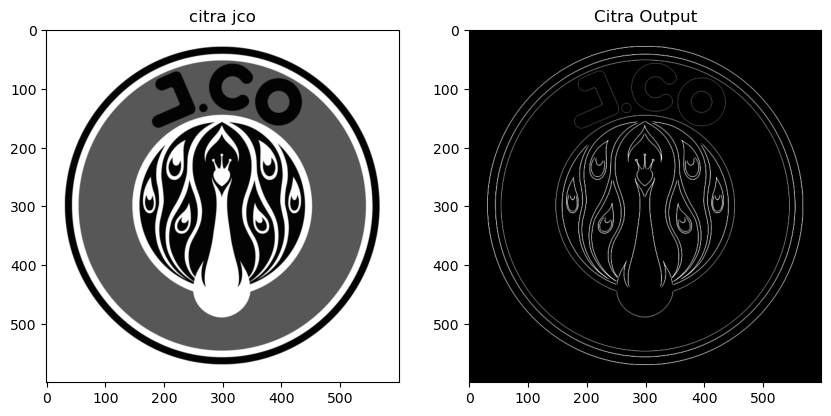

In [4]:
#202331090_Daffa Laksmana Naufal
citraOutput = cv2.filter2D(citra_j, -1, kernel)

fig, axs = plt.subplots(1, 2, figsize = (10,10))
ax = axs.ravel()

ax[0].imshow(citra_j, cmap = "gray")
ax[0].set_title("citra jco")

ax[1].imshow(citraOutput, cmap = "gray")
ax[1].set_title("Citra Output")

plt.show()

In [5]:
from skimage.util import random_noise

In [6]:
#202331090_Daffa Laksmana Naufal
noise_img_snp = random_noise(citra_j, mode = "s&p", amount = 0.2)

noise_img_gaussian = random_noise(citra_j, mode = "gaussian", mean = 0, var = 0.01)

noise_img_speckle = random_noise(citra_j, mode = "speckle")

noise_img_snp = np.array(255*noise_img_snp, dtype = 'uint8')
noise_img_gaussian = np.array(255*noise_img_gaussian, dtype = 'uint8')
noise_img_speckle = np.array(255*noise_img_speckle, dtype = 'uint8')

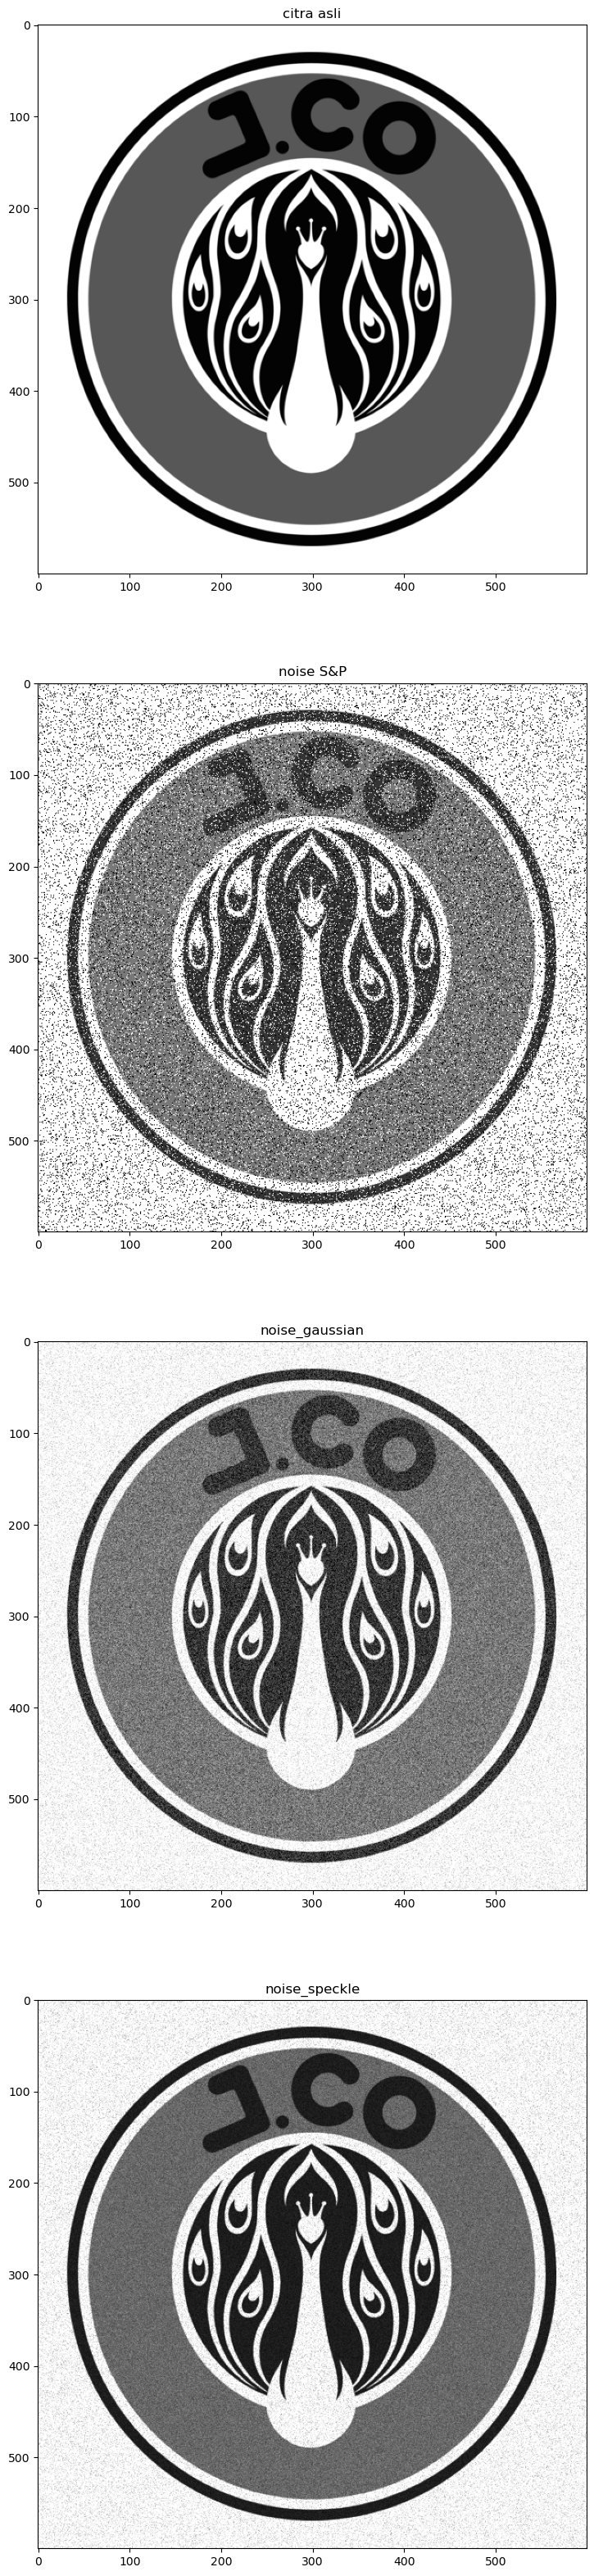

In [7]:
#202331090_Daffa Laksmana Naufal
fig, axs = plt.subplots(4,1, figsize = (10,40))
ax = axs.ravel()

ax[0].imshow(citra_j, cmap = "gray")
ax[0].set_title('citra asli')

ax[1].imshow(noise_img_snp, cmap = "gray")
ax[1].set_title('noise S&P')

ax[2].imshow(noise_img_gaussian, cmap = "gray")
ax[2].set_title('noise_gaussian')

ax[3].imshow(noise_img_speckle, cmap = "gray")
ax[3].set_title('noise_speckle')

plt.show()

In [8]:
kernel_3_3 = np.ones((3, 3), np.float32)/9

In [9]:
#202331090_Daffa Laksmana Naufal
img_snp_avg_filter = cv2.filter2D(noise_img_snp, cv2.CV_8U, kernel_3_3, (-1, -1), delta =0, borderType = cv2.BORDER_DEFAULT)
img_snp_median_filter = cv2.medianBlur(noise_img_snp, 3)

In [10]:
#202331090_Daffa Laksmana Naufal
img_gaussian_avg_filter = cv2.filter2D(noise_img_gaussian, cv2.CV_8U, kernel_3_3, (-1, -1), delta =0, borderType = cv2.BORDER_DEFAULT)
img_gaussian_median_filter = cv2.medianBlur(noise_img_gaussian, 3)

In [11]:
#202331090_Daffa Laksmana Naufal
img_speckle_avg_filter = cv2.filter2D(noise_img_speckle, cv2.CV_8U, kernel_3_3, (-1, -1), delta =0, borderType = cv2.BORDER_DEFAULT)
img_speckle_median_filter = cv2.medianBlur(noise_img_speckle, 3)

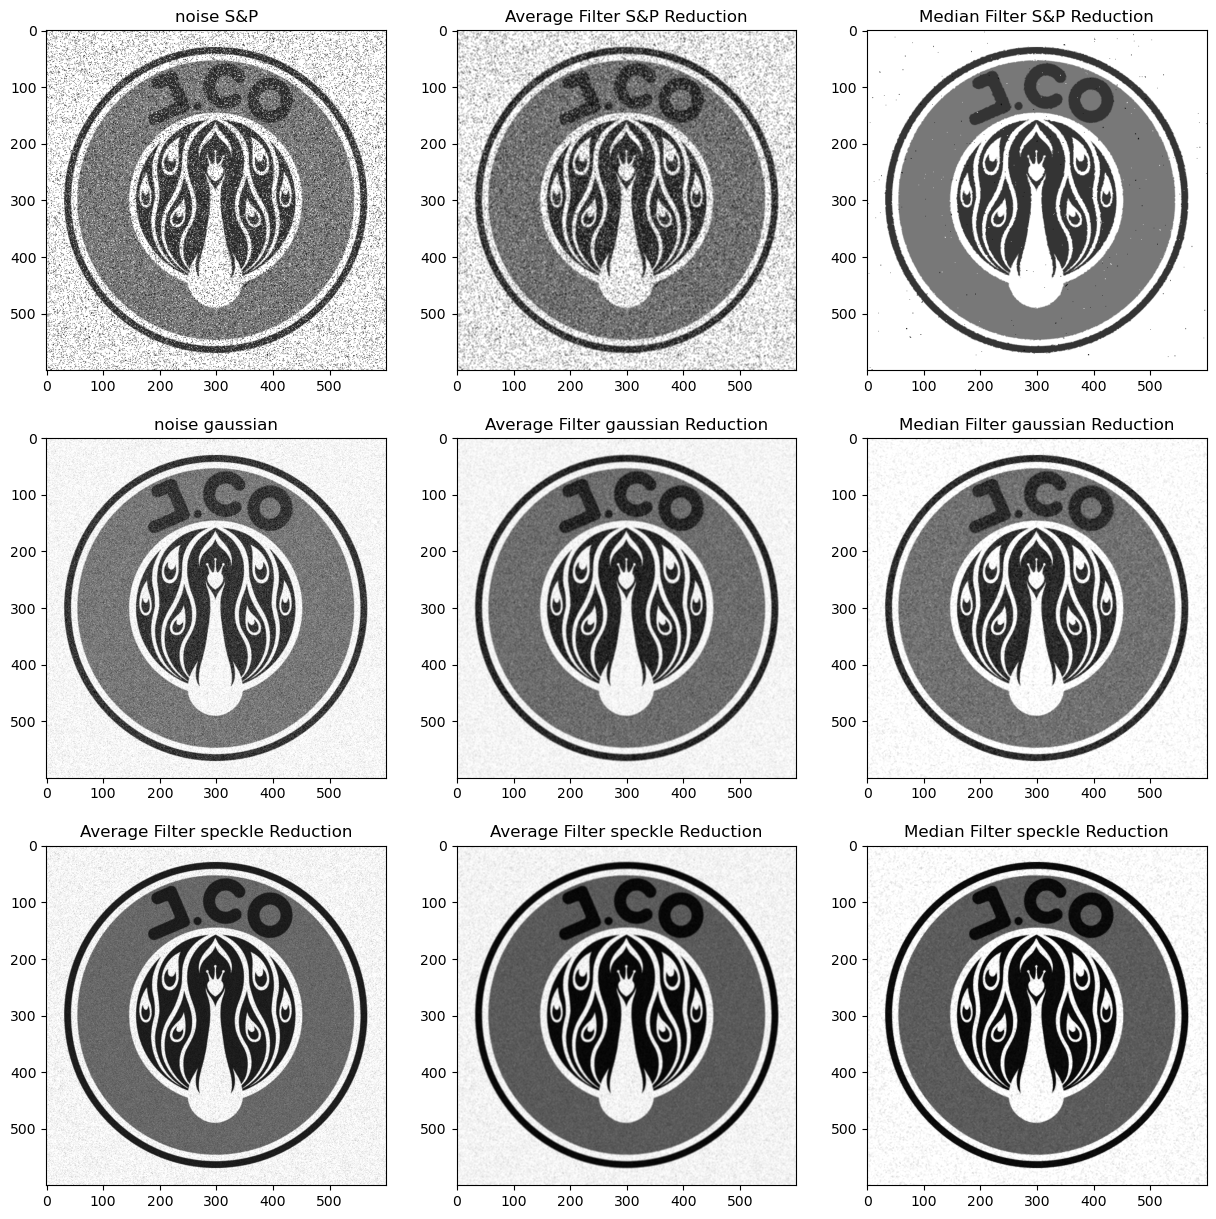

In [12]:
#202331090_Daffa Laksmana Naufal
fig, axs = plt.subplots(3, 3, figsize = (15, 15))
ax = axs.ravel()

ax[0].imshow(noise_img_snp, cmap = "gray")
ax[0].set_title('noise S&P')

ax[1].imshow(img_snp_avg_filter, cmap = "gray")
ax[1].set_title('Average Filter S&P Reduction')

ax[2].imshow(img_snp_median_filter, cmap = "gray")
ax[2].set_title('Median Filter S&P Reduction')

ax[3].imshow(noise_img_gaussian, cmap = "gray")
ax[3].set_title('noise gaussian')

ax[4].imshow(img_gaussian_avg_filter, cmap = "gray")
ax[4].set_title('Average Filter gaussian Reduction')

ax[5].imshow(img_gaussian_median_filter, cmap = "gray")
ax[5].set_title('Median Filter gaussian Reduction')

ax[6].imshow(noise_img_speckle, cmap = "gray")
ax[6].set_title('Average Filter speckle Reduction')

ax[7].imshow(img_speckle_avg_filter, cmap = "gray")
ax[7].set_title('Average Filter speckle Reduction')

ax[8].imshow(img_speckle_median_filter, cmap = "gray")
ax[8].set_title('Median Filter speckle Reduction')

plt.show()

In [13]:
#202331090_Daffa Laksmana Naufal
copyCitra1 = citra_j.copy().astype(float)

m1, n1 = copyCitra1.shape
output1 = np.empty([m1, n1])

print("shape copy citra 1 : ", copyCitra1.shape)
print("shape output citra 1 : ", output1.shape)

print("m1 : ", m1)
print("n1 : ", n1)

print()

shape copy citra 1 :  (600, 600)
shape output citra 1 :  (600, 600)
m1 :  600
n1 :  600



In [14]:
#202331090_Daffa Laksmana Naufal
for baris in range (0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        jumlah = copyCitra1[a1-1,b1-1] + copyCitra1[a1-1, b1] + copyCitra1[a1-1, b1+1] +\
        copyCitra1[a1, b1-1] + copyCitra1[a1,b1] + copyCitra1[a1, b1+1] +\
        copyCitra1[a1+1, b1-1] + copyCitra1[a1+1, b1] + copyCitra1[a1+1, b1+1]
        output1[a1, b1] = (1/9 * jumlah)

output1 = np.asarray (output1, dtype = np.uint8)

Text(0.5, 1.0, 'input citra 2')

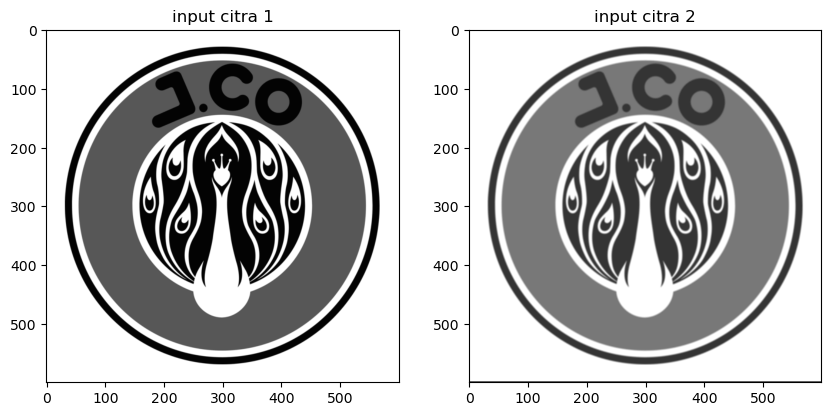

In [15]:
#202331090_Daffa Laksmana Naufal
fig, axs = plt.subplots(1, 2, figsize=(10,10))
ax = axs.ravel()

ax[0].imshow(citra_j, cmap = "gray")
ax[0].set_title('input citra 1')

ax[1].imshow(output1, cmap = "gray")
ax[1].set_title('input citra 2')

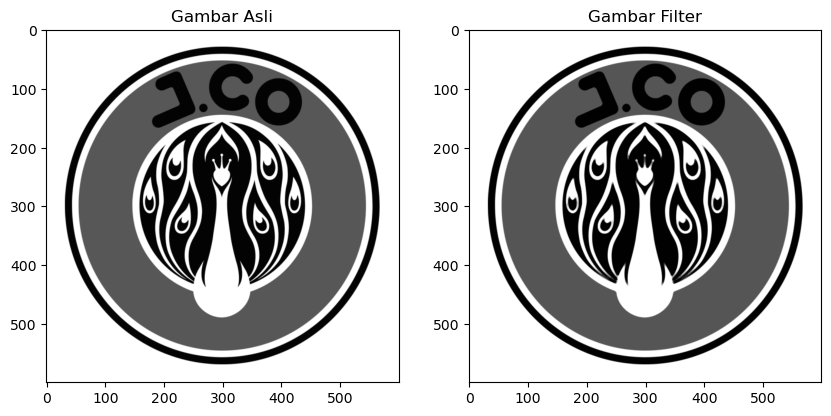

In [16]:
#202331090_Daffa Laksmana Naufal

citra_m3 =  citra_j
img_median = citra_m3.copy()
img_median_after = cv2.medianBlur(img_median, 5)

fig, axs = plt.subplots(1,2, figsize=(10,20))
ax = axs.ravel()

ax[0].imshow(img_median, cmap = "gray")
ax[0].set_title('Gambar Asli')

ax[1].imshow(img_median_after, cmap = "gray")
ax[1].set_title('Gambar Filter')

plt.show()

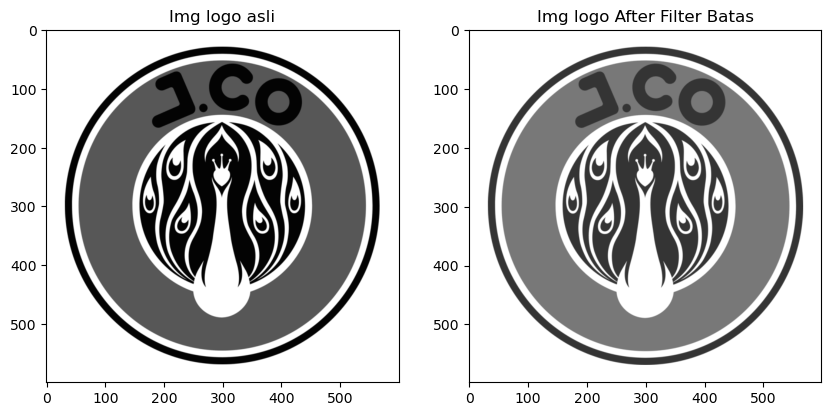

In [17]:
#202331090_Daffa Laksmana Naufal

citra_m3 = citra_j
copyCitra3 = citra_m3.copy().astype(float)

m1, n1= copyCitra3.shape
output3 = np.empty([m1-1, n1-1])

for baris in range(1, m1-1):
    for kolom in range(1, n1-1):
        a1 = baris
        b1 = kolom
        arr = np.array([copyCitra3[a1-1, b1-1], copyCitra3[a1-1, b1], copyCitra3[a1-1, b1+1], copyCitra3[a1, b1-1],
                        copyCitra3[a1, b1+1], copyCitra3[a1+1, b1-1], copyCitra3[a1+1, b1], copyCitra3[a1+1, b1+1]])
        
        minPiksel = np.amin(arr)
        maxPiksel = np.amax(arr)
        
        if (copyCitra3[baris, kolom] < minPiksel):
            output3[baris, kolom] = minPiksel
        else :
            if (copyCitra3[baris, kolom] > maxPiksel):
                output3[baris, kolom] = maxPiksel
            else :
                output3[baris, kolom] = copyCitra3[baris, kolom]
                
output3 = np.asarray(output3, dtype = np.uint8)

fig, axs = plt.subplots(1, 2, figsize = (10,10))
ax = axs.ravel()

ax[0].imshow(citra_m3, cmap = "gray")
ax[0].set_title("Img logo asli")

ax[1].imshow(output3, cmap = "gray")
ax[1].set_title("Img logo After Filter Batas")

plt.show()